#### REVENUE BOOST ANALYZER ####

Objective - Improve customer experience by analysing sales data and Increase revenue

In [42]:
#import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
#pandas doesn't read unicode_encoded data properly. So while reading the CSV we have to pass unicode_escape so that the pandas will escape unicode encoding. This is a precautionary step otherwise it cannot read the data which is unicode encoded. Unicode encoded is one such encoding which is not bydefault permitted by pandas dataframe.

In [44]:
df.shape

(11251, 14)

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [47]:
#drop unrelated/blank columns
df.drop(['Status','Unnamed'], axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [49]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [51]:
#filter rows with atleast one null value
rows_with_nulls = df[df.isnull().any(axis=1)]

print('Rows with null values:')
print(rows_with_nulls)

Rows with null values:
     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  

In [52]:
#Calculate mean for each category and fill NA with mean for that category
df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [53]:
df[(df['User_ID'] == 1005261) & (df['Product_ID'] == 'P00057942')]

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
111,1005261,Apoorva,P00057942,F,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,14707.468791


In [54]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [55]:
#Change data type
df['Amount'] = df['Amount'].astype('int')

In [56]:
df['Amount'].dtypes

dtype('int32')

In [57]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [58]:
#Rename Columns
df.rename(columns = {'Marital_Status': 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [59]:
#describe() method returns description of the data in the dataframe (i.e mean, min, max..etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [60]:
#use describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [61]:
#Define a function to categorize age

def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '51-55'
    else:
        return '55+'

#Apply the function to create a new Column 'Age_group'
df['Age_group'] = df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

EDA - Exploratory Data Analysis

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

GENDER

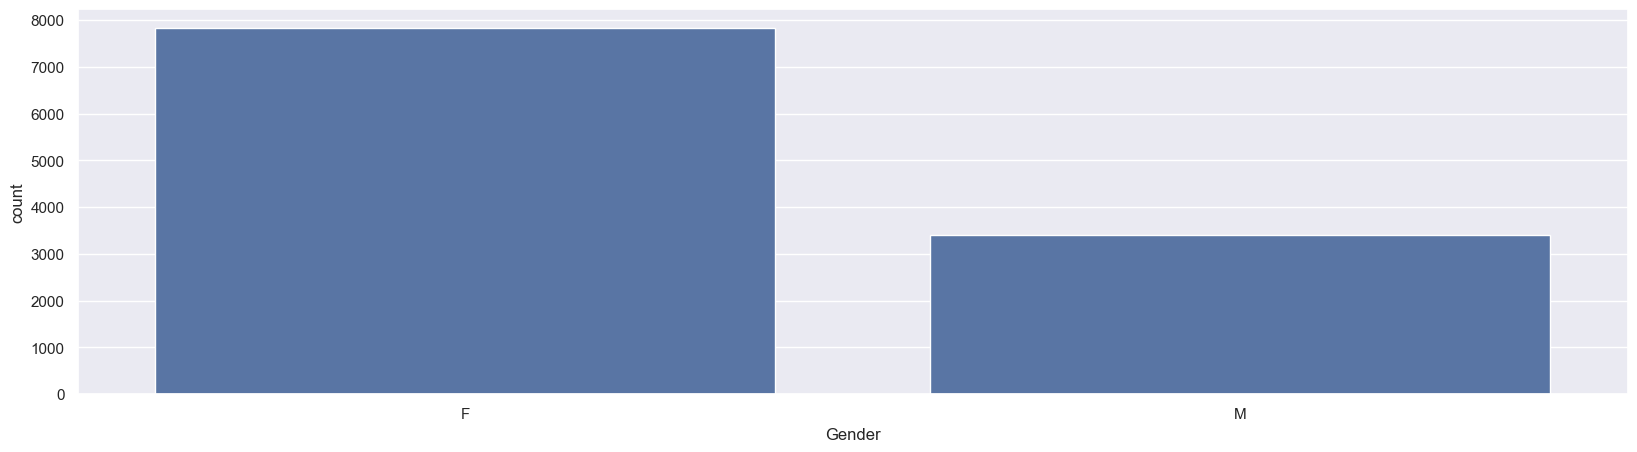

In [63]:
#plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)

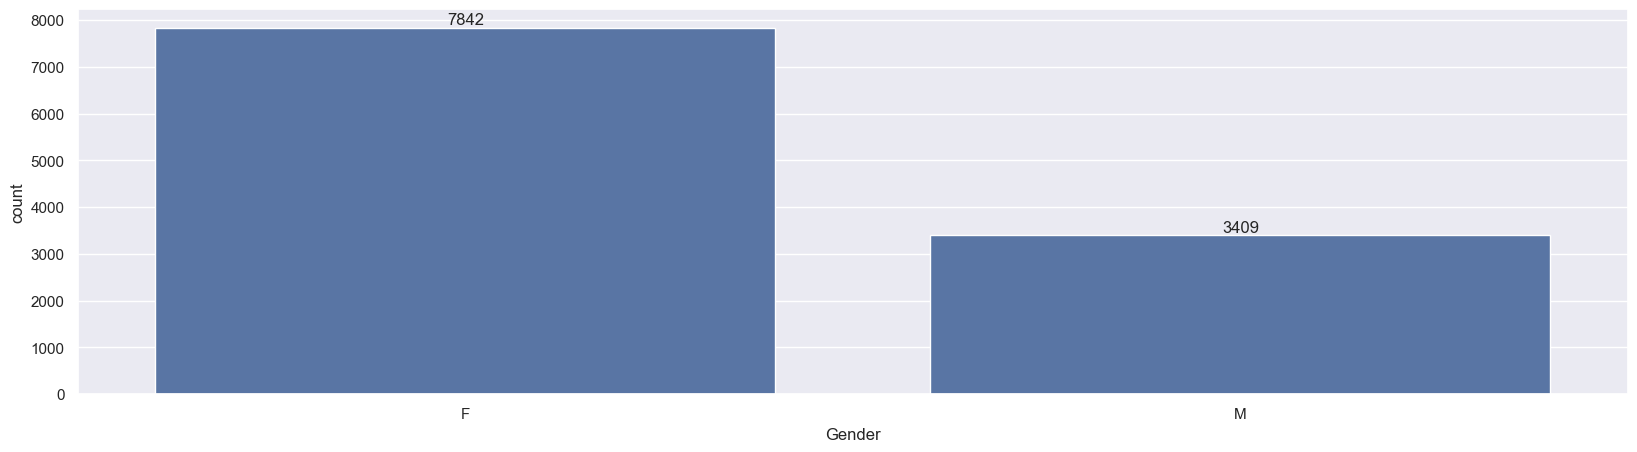

In [64]:
#Printing the label of the bars

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

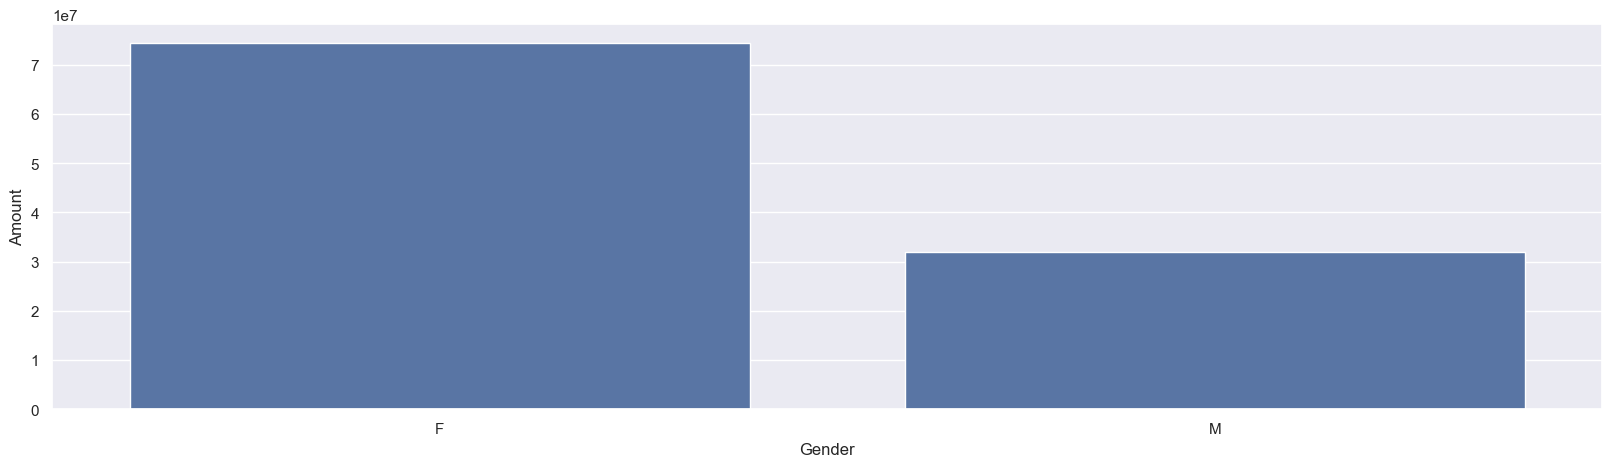

In [65]:
#plotting a bar graph for gender vs total amount 

amount_generate = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax = sns.barplot(x='Gender', y='Amount', data = amount_generate)


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men* 

AGE

In [66]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

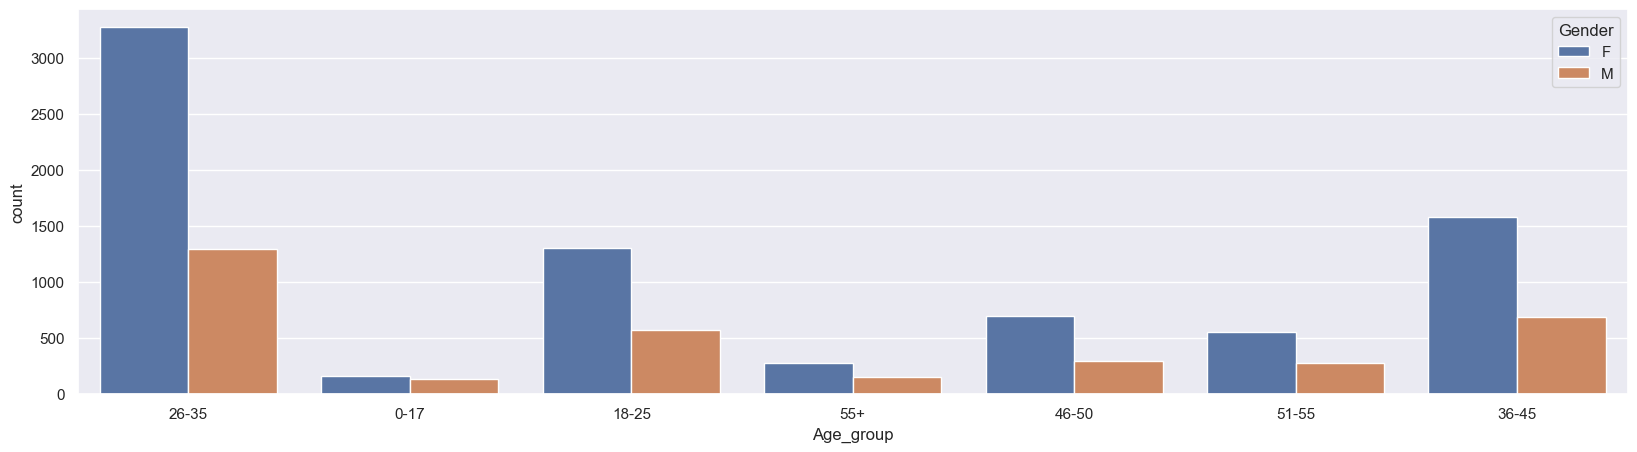

In [67]:
ax = sns.countplot(data = df, x= 'Age_group', hue='Gender')

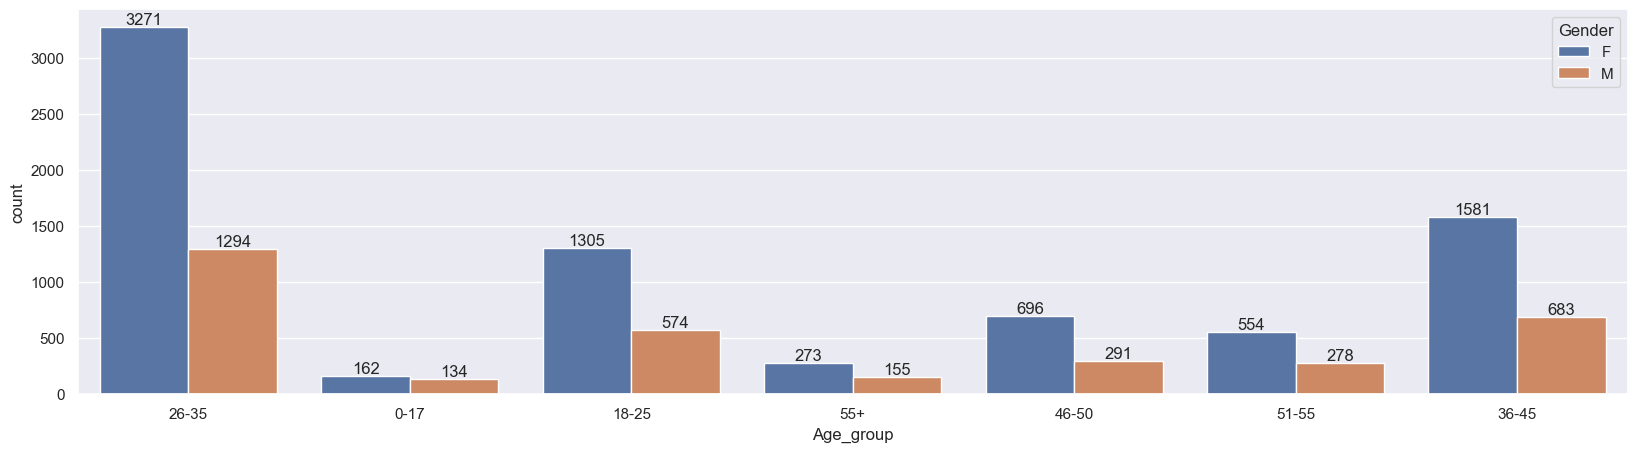

In [68]:
ax = sns.countplot(data = df, x= 'Age_group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

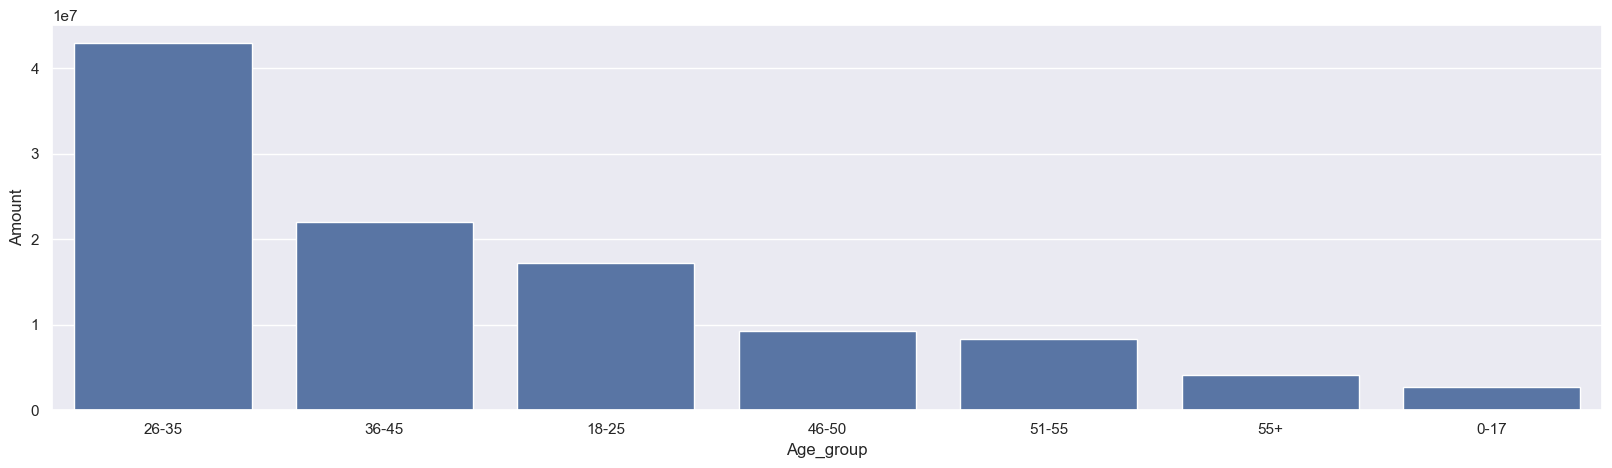

In [69]:
#Total amount vs Age Group
sales_age = df.groupby(['Age_group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Age_group', y='Amount', data = sales_age)

*From above graphs we can see that most of the buyers are of the age group 26-35 years and female are prominant buyers in that age group*

State

<Axes: xlabel='State', ylabel='Orders'>

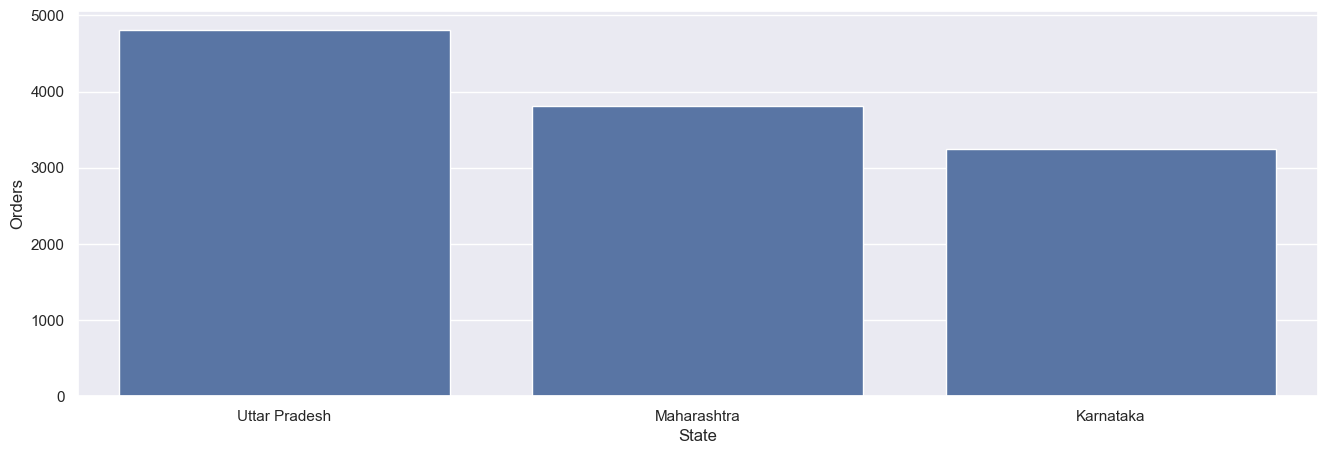

In [70]:
#Total number of orders from top 10 states

orders_data = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(3)

sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = orders_data, y = 'Orders' , x = 'State')


<Axes: xlabel='State', ylabel='Amount'>

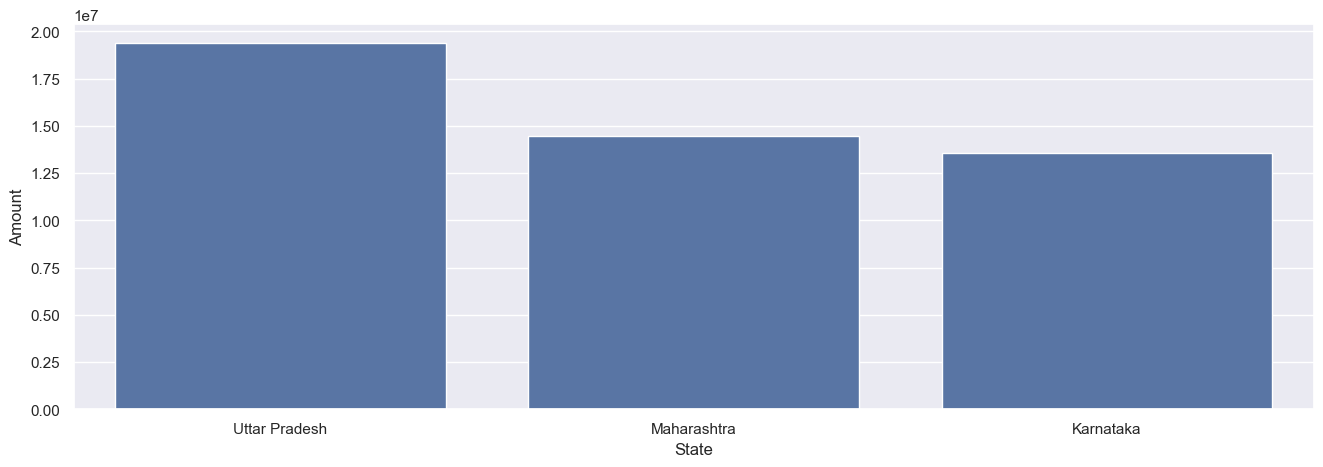

In [71]:
#Total amount/sales from top 10 states

amount_data = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(3)

sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = amount_data, y = 'Amount' , x = 'State')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

Marital Status

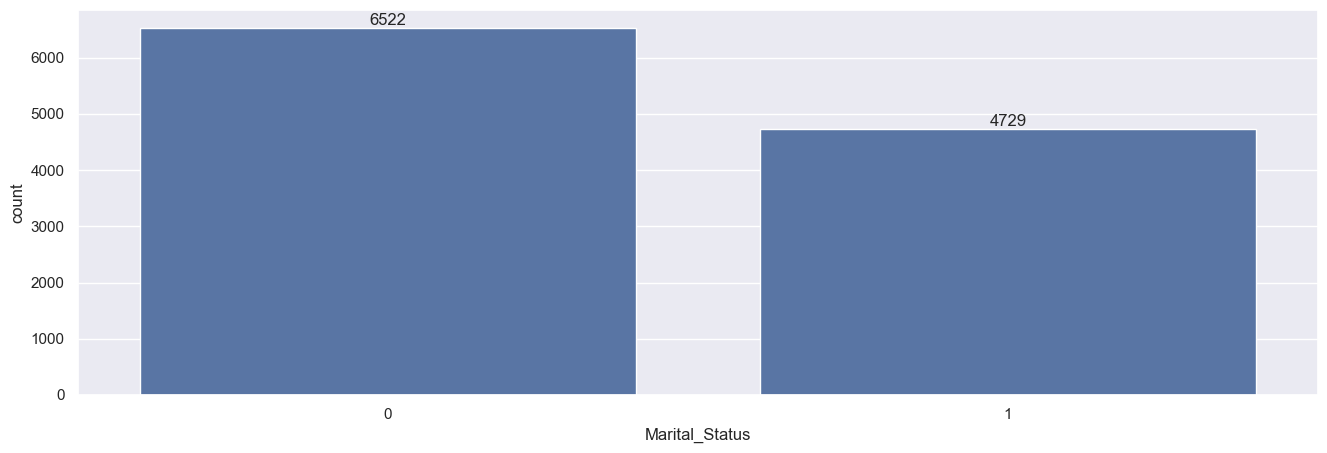

In [72]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc = {'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

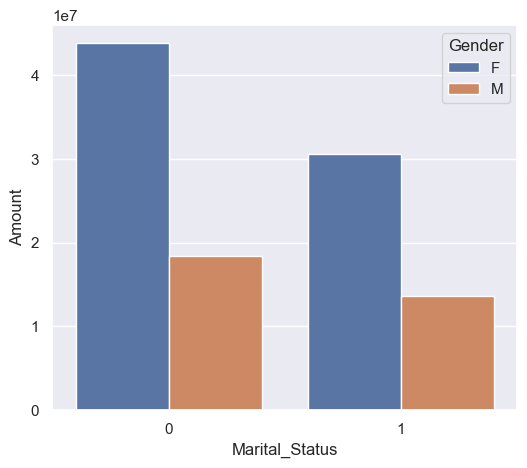

In [73]:

married_data = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = married_data, y = 'Amount' , x = 'Marital_Status', hue='Gender')


*From above graphs we can see that most of the buyers are married (Women) and they have high purchasing power*

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

OCCUPATION

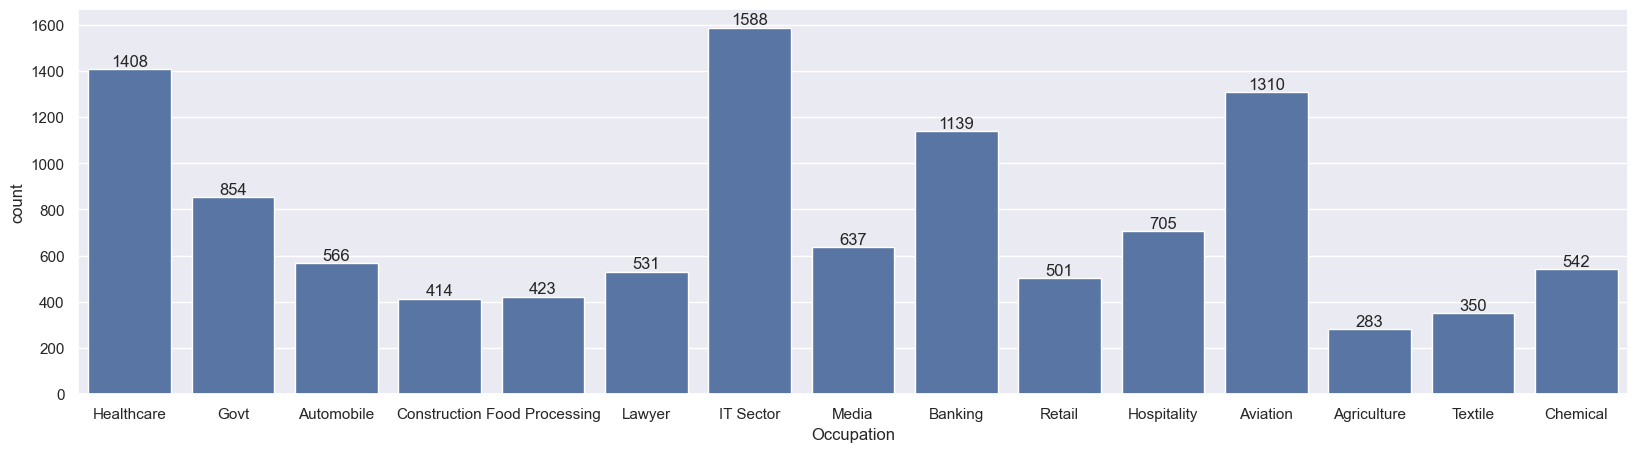

In [75]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

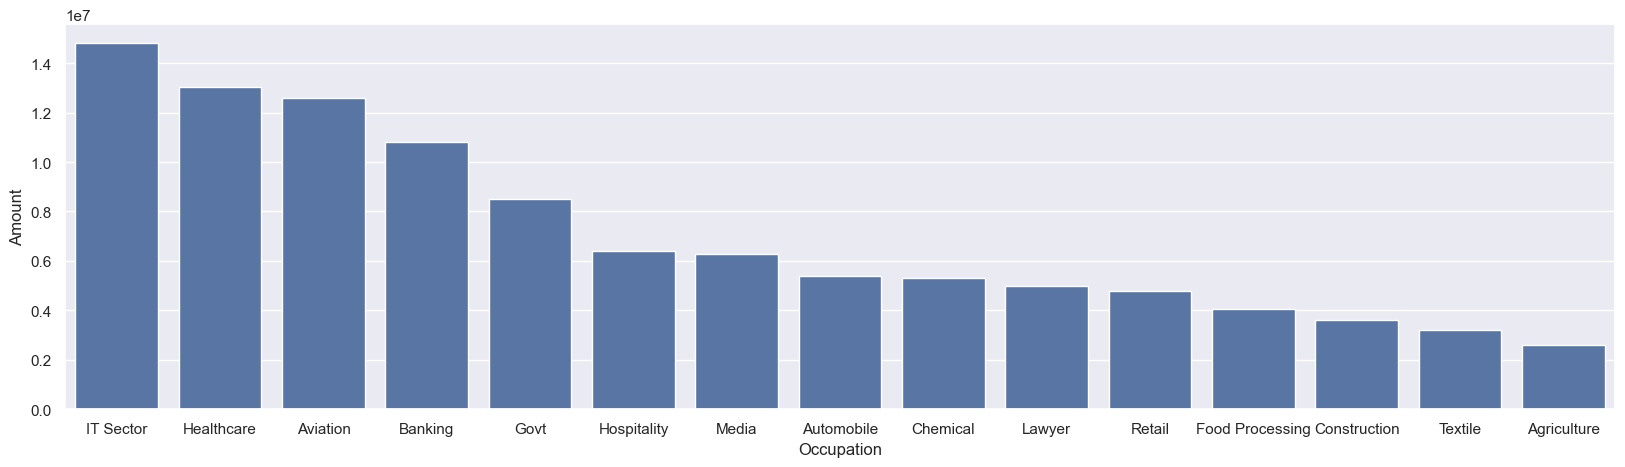

In [76]:
sales_data = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_data, y = 'Amount' , x = 'Occupation')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and aviation sector*

PRODUCT CATEGORY

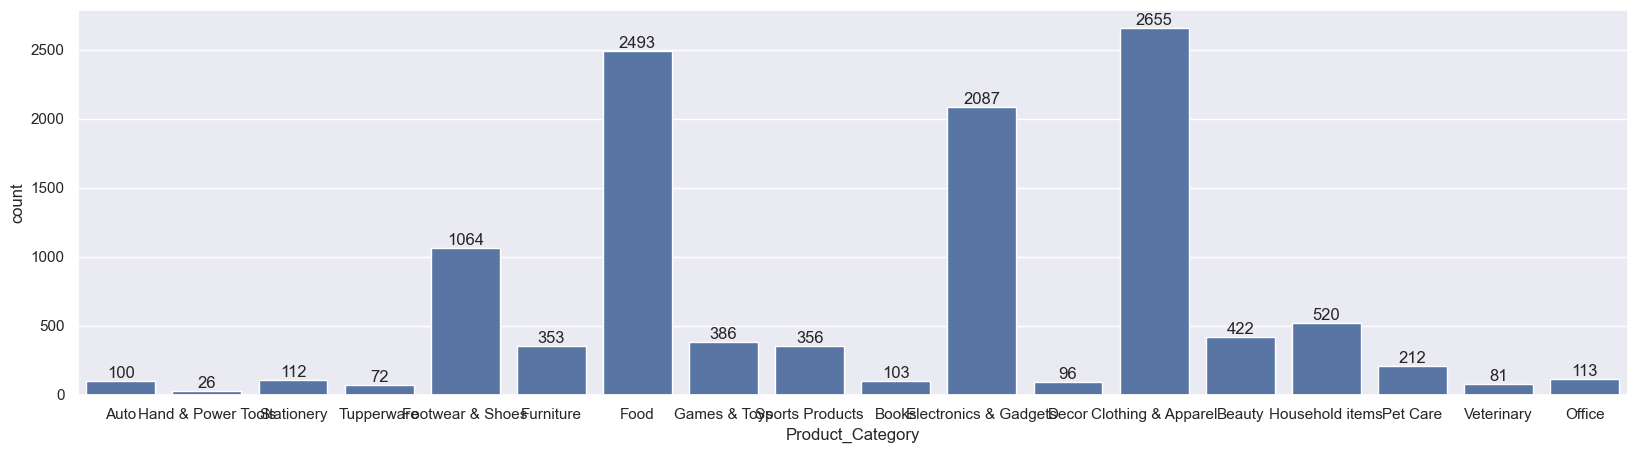

In [77]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

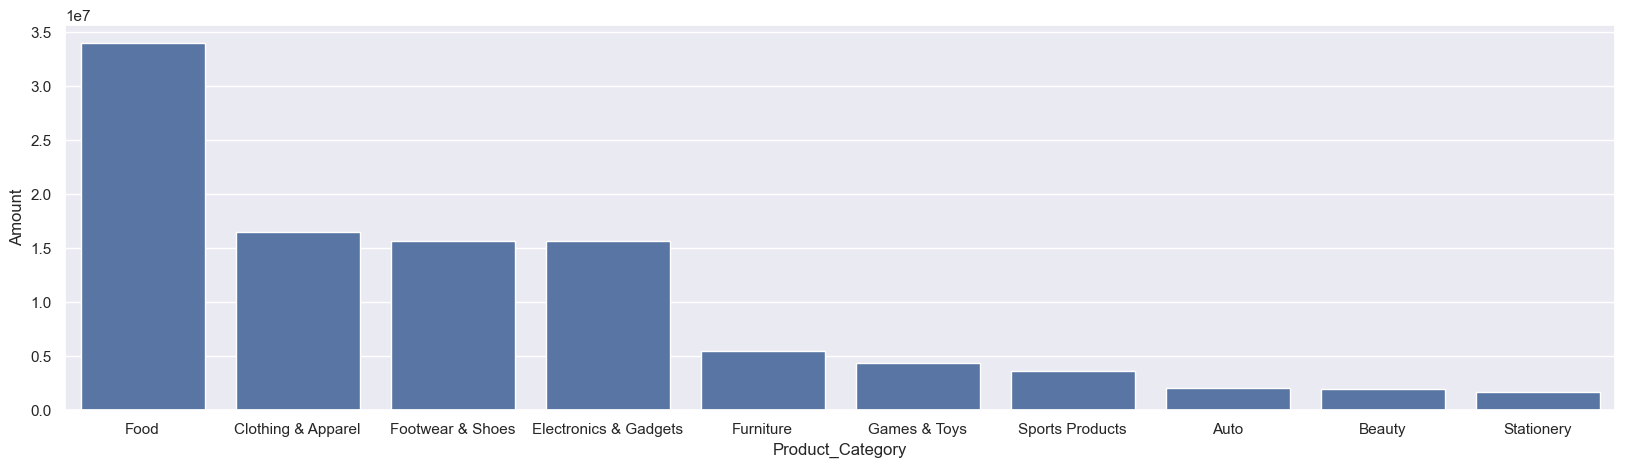

In [78]:
sales_data = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_data, y = 'Amount' , x = 'Product_Category')

*From the above graphs we can see that the most product sold are from Food, Clothing and Electronics category*

Product_ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

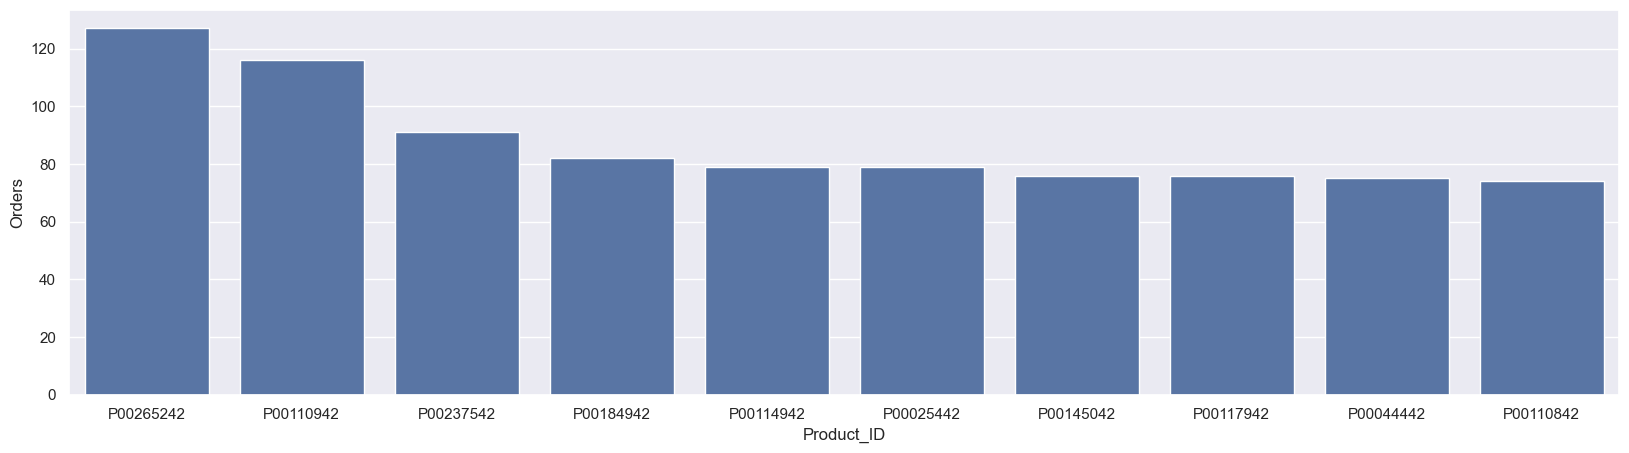

In [79]:
sales_data = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_data, y = 'Orders' , x = 'Product_ID')

<Axes: xlabel='Product_ID'>

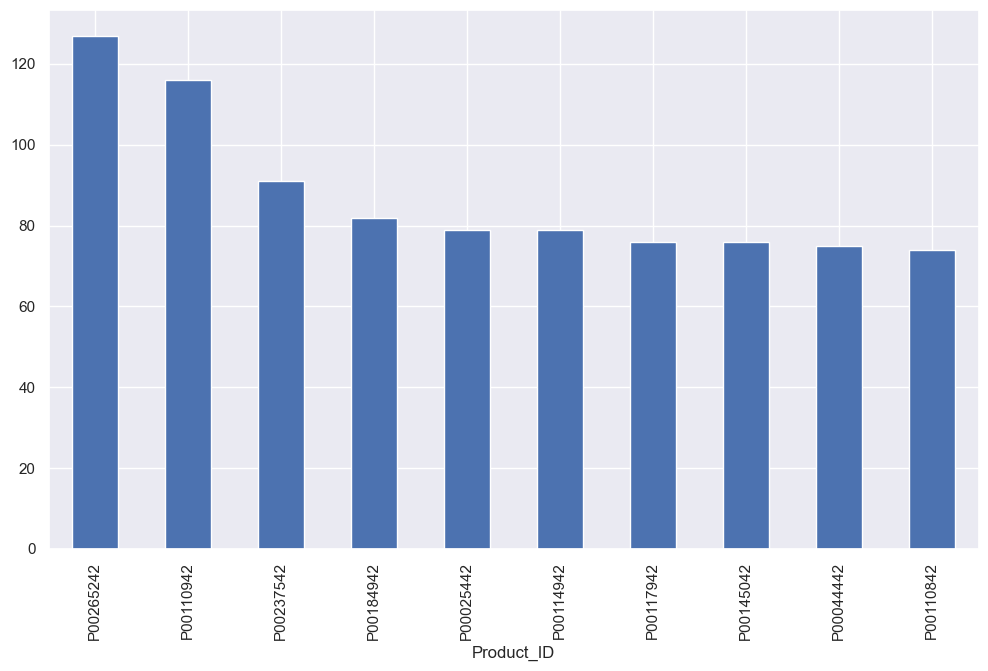

In [80]:
#top 10 most sold products (same as above)

fig1, ax1 = plt.subplots(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

*From above graphs we can see that from all the products being sold Product_ID = P00265242, P00110942 and P00237542 are the top products and most sold products*

Married Women of age group 26-35 years from Uttar Pradesh, Maharashtra and Karnataka who are working in IT, Healthcare and Aviation sector are more likely to buy products from Food, Clothing and Electronics Category